<a href="https://colab.research.google.com/github/rotemfaraj/15.05/blob/master/H1_nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**שאלה 1**
הניתוח מאפשר להבין את הדינמיקה בין פרות בעדר, ע"י הסתכלות על הקשתות, המסמלות אינטראקציה בין זוג פרות וניתוחן. באמצעות ניתוח הרשת ניתן לזהות פרות מרכזיות יותר, שיש להן יותר אינטראקציות עם שאר הפרות בעדר, ולכן אף עשויות להשפיע על תנועת העדר, לאתר קבוצות בעדר, או היררכיה, ולזהות שינויים בדפוסי ההתנהגות שעשויים להעיד על בעיה כלשהי. בנוסף, ניתוח הרשת מסייע לבחון כיצד משתנים דפוסי הקשרים בעקבות שינויי סביבה למשל. בהקשר לנתונים שברשותנו הכוללים את שמות הפרות, הקשרים ביניהן ותדירות האינטראקציות, ניתוח רשת יכול לתרום להבנה על מבנה העדר, לאפשר זיהוי של פרות מבודדות או דומיננטיות, ובסופו של דבר זה עשוי לשמש ככלי עזר בקבלת החלטות הקשורות לעדר.




**שאלה 2**
אנו היינו מגדירות את הגרף כגרף לא מכוון, כיוון שאין כל הבחנה בין אילו פרות יזמו את האינטראקציה. כלומר מאחר והאינטראקציות הן הדדיות אין משמעות לכיוון הקשת והדבר גם מתיישב עם העובדה שהקשרים מופיעים רק פעם אחת לכל זוג.

number of nodes: 28
number of edges: 205


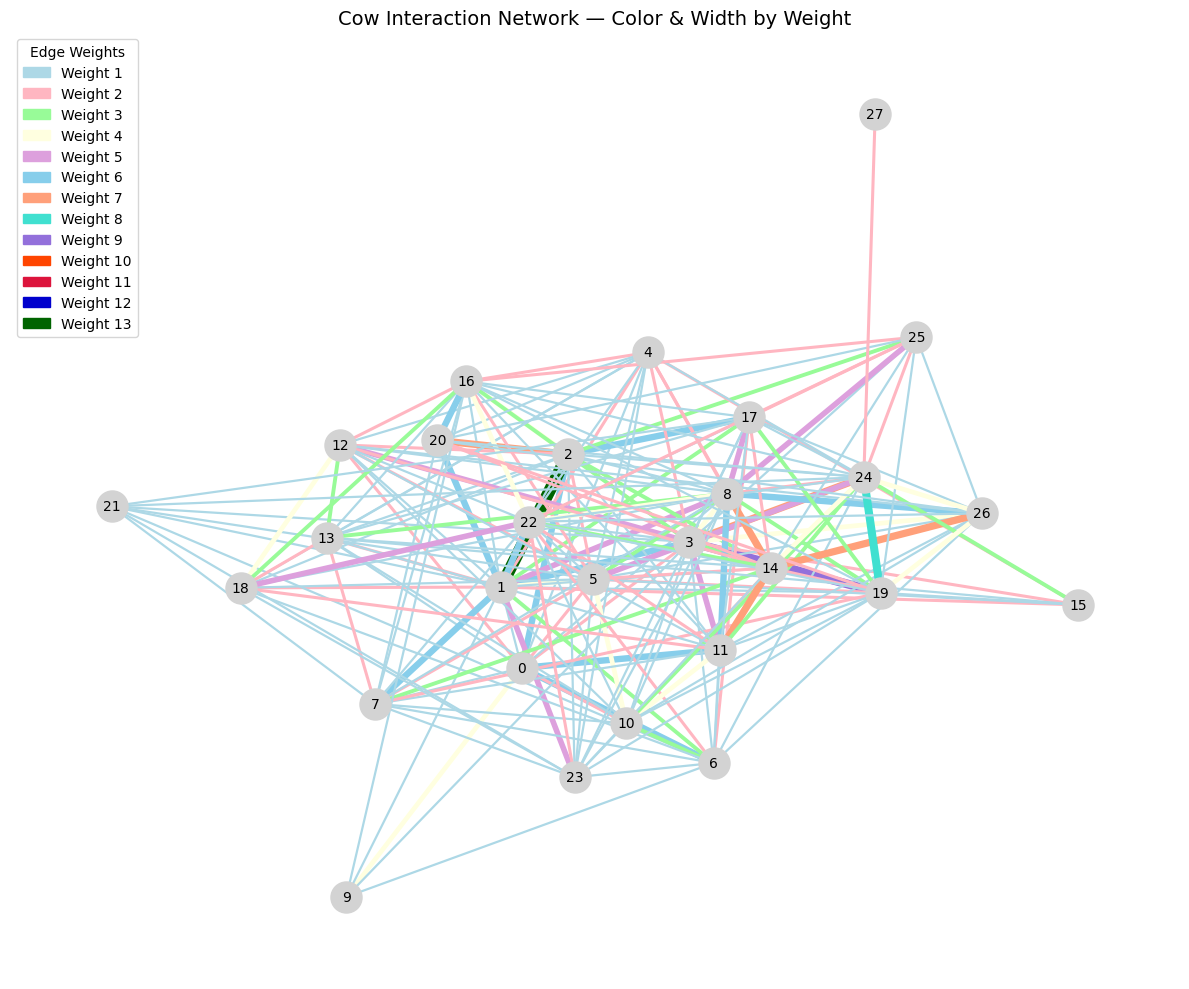

In [23]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

edges_df = pd.read_csv("cattle_edges.csv")
nodes_df = pd.read_csv("cattle_nodes.csv")

G = nx.Graph()

for idx, row in nodes_df.iterrows():
  G.add_node(row['id'], label = row['name'])

for idx, row in edges_df.iterrows():
  G.add_edge(row['source'], row['target'], weight = row['weight'])

print(f"number of nodes: {G.number_of_nodes()}")
print(f"number of edges: {G.number_of_edges()}")

max_weight = edges_df['weight'].max()
print(f"max weight: {max_weight}")

# מפת צבעים ממשקל 1 עד 13 - מהבהיר לכהה
weight_color_map = {
    1: '#ADD8E6',   # תכלת בהיר
    2: '#FFB6C1',   # ורוד בהיר
    3: '#98FB98',   # ירוק בהיר
    4: '#FFFFE0',   # צהוב בהיר
    5: '#DDA0DD',   # סגול בהיר
    6: '#87CEEB',   # תכלת בינוני
    7: '#FFA07A',   # סלמון
    8: '#40E0D0',   # טורקיז
    9: '#9370DB',   # סגול כהה
    10: '#FF4500',  # כתום חזק
    11: '#DC143C',  # אדום עז
    12: '#0000CD',  # כחול כהה
    13: '#006400'   # ירוק כהה מאוד
}

# צבעים ועוביים לפי משקל הקשת
edge_colors = []
edge_widths = []

for u, v, w in G.edges(data=True):
    weight = w['weight']
    color = weight_color_map.get(weight, 'black')
    edge_colors.append(color)
    edge_widths.append(1 + 0.8 * weight)

# מיקום הצמתים (עם מרווח גדול יותר)
pos = nx.spring_layout(G, seed=42, k=1.5)  # ערך k גבוה יותר = מרווח יותר

# ציור הגרף
plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightgray')
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths)
nx.draw_networkx_labels(G, pos, labels={node: node for node in G.nodes}, font_size=10)

# יצירת מקרא לצבעים
legend_handles = []
for weight, color in weight_color_map.items():
    patch = mpatches.Patch(color=color, label=f'Weight {weight}')
    legend_handles.append(patch)

plt.legend(handles=legend_handles, title="Edge Weights", loc='upper left')
plt.title("Cow Interaction Network — Color & Width by Weight", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

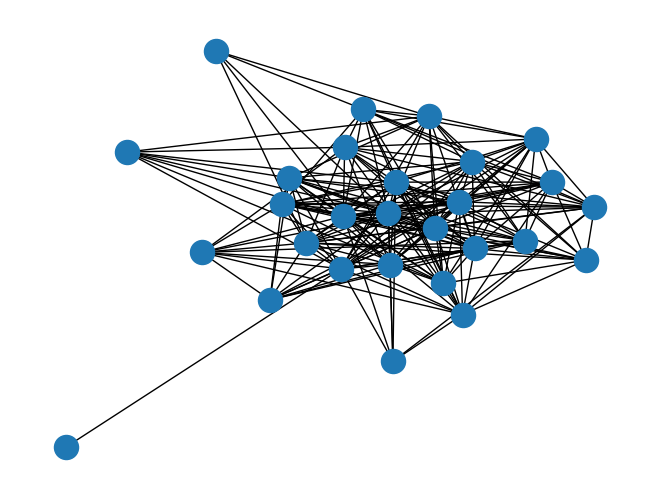

In [8]:
import pandas as pd
df = pd.read_csv('cattle_edges.csv') # mage sure 'target' and 'source' columns are specified

Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(df, edge_attr='weight', create_using=Graphtype)
nx.draw(G)

In [10]:
# Average degree of a graph
degrees = [d for n, d in G.degree()]
sum(degrees)/len(degrees)

# For a weighted version, see Netowrkx's average_degree_connectivity function.

14.642857142857142

(array([1., 1., 1., 1., 2., 2., 8., 4., 4., 4.]),
 array([ 1. ,  3.1,  5.2,  7.3,  9.4, 11.5, 13.6, 15.7, 17.8, 19.9, 22. ]),
 <BarContainer object of 10 artists>)

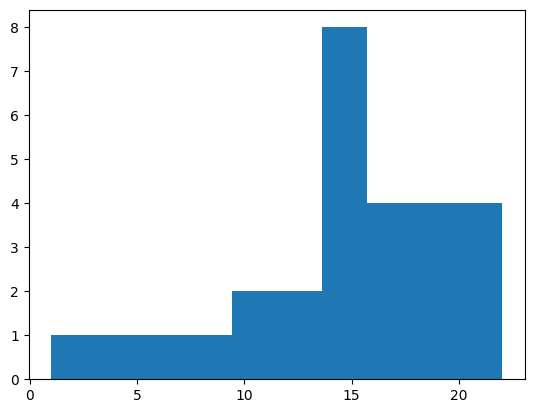

In [11]:
# Plotting the degree distribution
plt.hist(degrees)